# Probem Statement

# Introduction

# Importing libraries

In [3]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [4]:
#loading and dispaying the dataset
data = pd.read_csv("Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#shape of the data
print("shape of the datset is :", data.shape)

shape of the datset is : (1470, 35)



# Feature Engineering and Exporatory Data Analysis

In [6]:
#ets checking the missing values in the data
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
#printing the head of columns
data.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [9]:
#going to drop all of these columns because they dont make sence actually 
data = data.drop(['Over18', 'StandardHours', 'EmployeeCount','TrainingTimesLastYear','Education', 'MonthlyRate'],axis = 1)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,2,Female,...,11,3,1,0,8,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,2,3,Male,...,23,4,4,1,10,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,4,Male,...,15,3,2,0,7,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,5,4,Female,...,11,3,3,0,8,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,7,1,Male,...,12,3,4,1,6,3,2,2,2,2


In [10]:
#now lets replace Attrition, Gender, overtime, MaritalStatus in datset to 0's and 1's
Num_val = {'Yes':1, 'No':0}
gen = {'Male' : 1, 'Female' : 0}
maried = {'Married' : 1, 'Single' : 0, 'Divorced' : 2}
data['Attrition'] = data["Attrition"].apply(lambda x: Num_val[x])
data["OverTime"] = data["OverTime"].apply(lambda x : Num_val[x])
data["Gender"] = data["Gender"].apply(lambda x : gen[x])
data['MaritalStatus'] = data["MaritalStatus"].apply(lambda x: maried[x])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,Life Sciences,1,2,0,...,11,3,1,0,8,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,Life Sciences,2,3,1,...,23,4,4,1,10,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Other,4,4,1,...,15,3,2,0,7,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Life Sciences,5,4,0,...,11,3,3,0,8,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,Medical,7,1,1,...,12,3,4,1,6,3,2,2,2,2


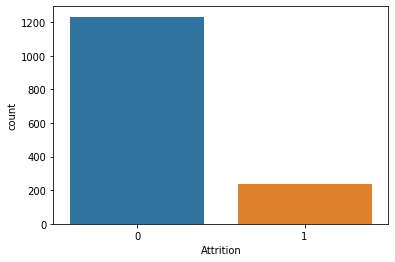

In [11]:
sns.countplot(data["Attrition"])

In [12]:
#grouping categorical data and numerical data into different lists
num_cols = [col for col in data.columns if data[col].dtypes == 'int']
cat_cols = [col for col in data.columns if data[col].dtypes == 'object']

In [13]:
print(num_cols)
print()
print(cat_cols)

['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

['BusinessTravel', 'Department', 'EducationField', 'JobRole']


In [14]:
# print the categorical columns
for col in cat_cols:
    print(col)
    print(data[col].value_counts())
    print()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64



# Outliers

In [15]:
#In machine learning outlier detection is most important for building an accutate model to get good results
#lets create a function that deals with checking outliers
def plotingvariables(df, column):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(df[column], alpha = 0.5)
    plt.title(column)

    plt.subplot(1,2,2)
    plt.boxplot(df[column])
    plt.show()
    

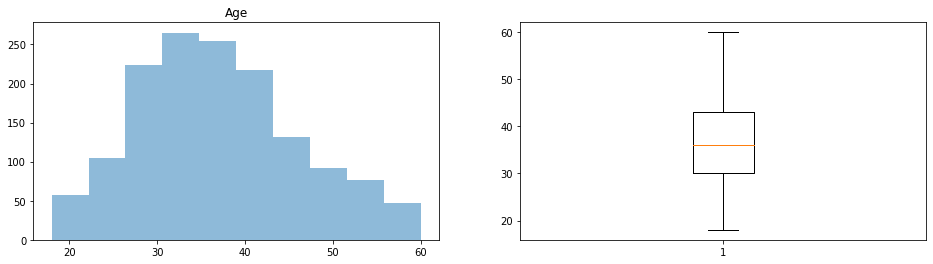

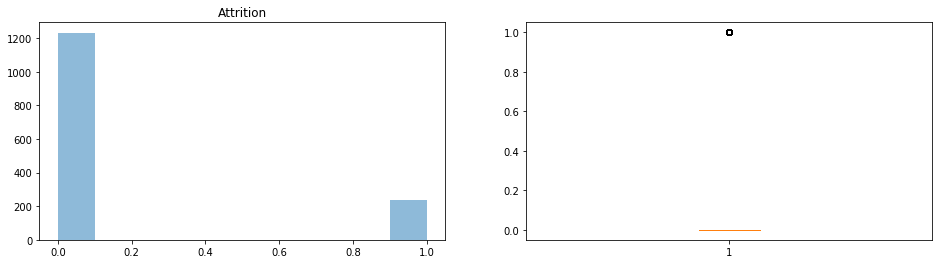

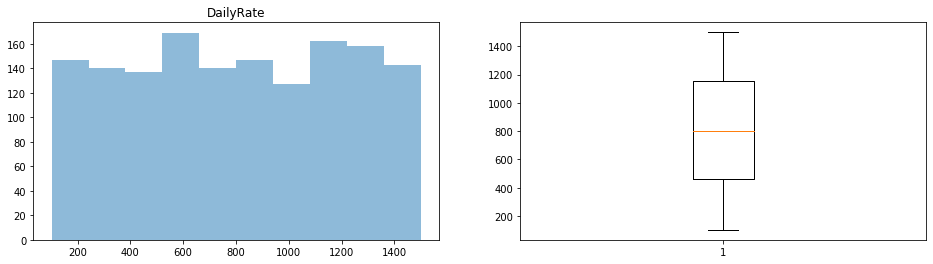

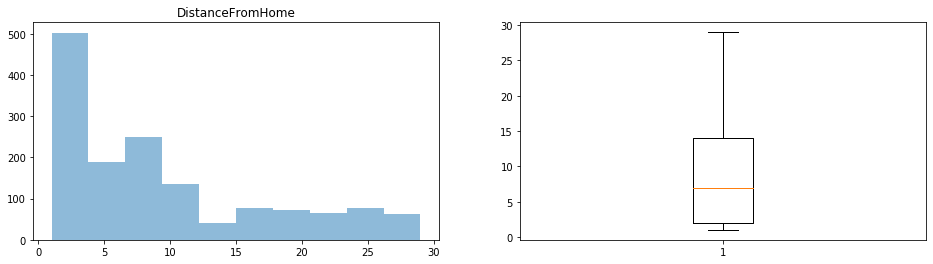

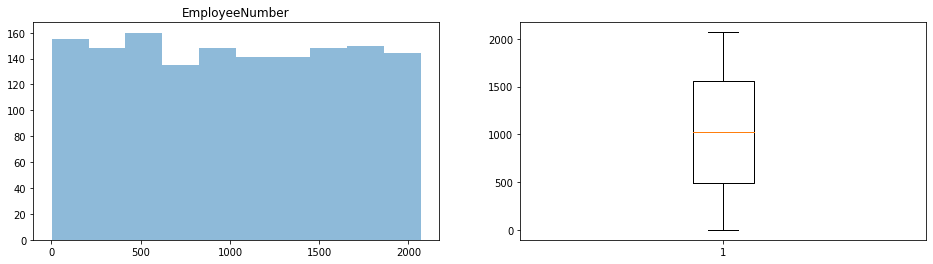

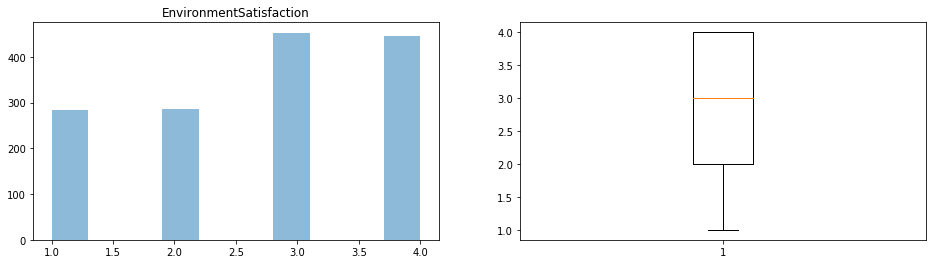

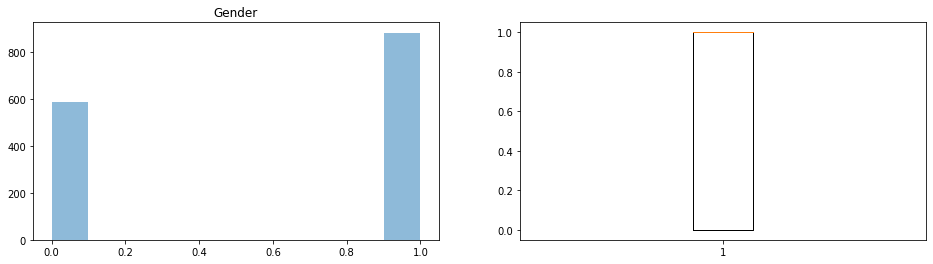

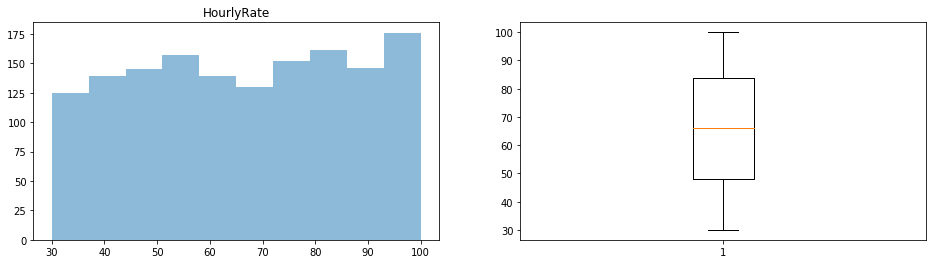

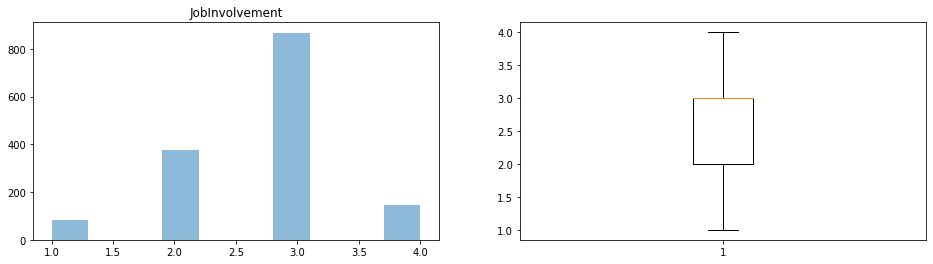

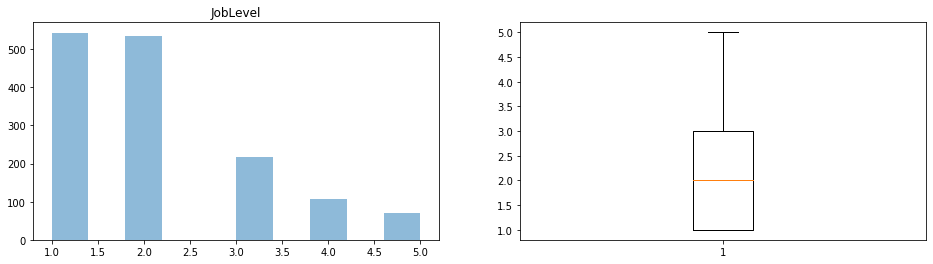

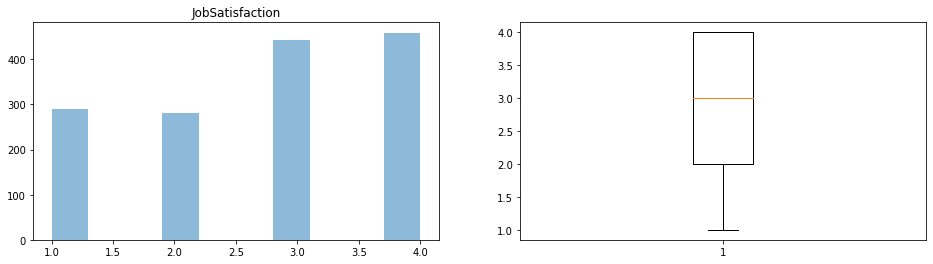

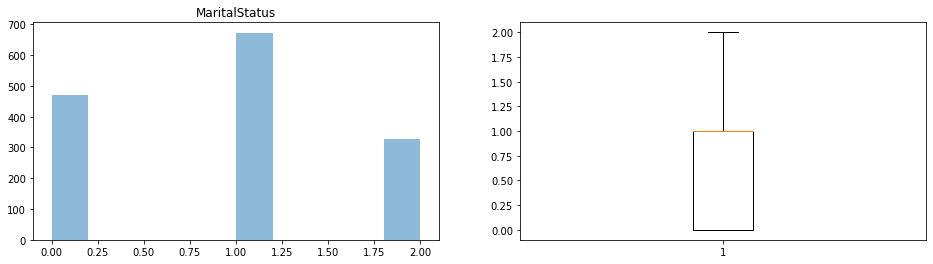

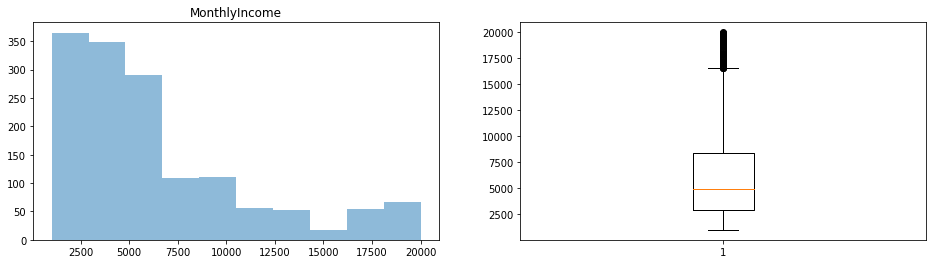

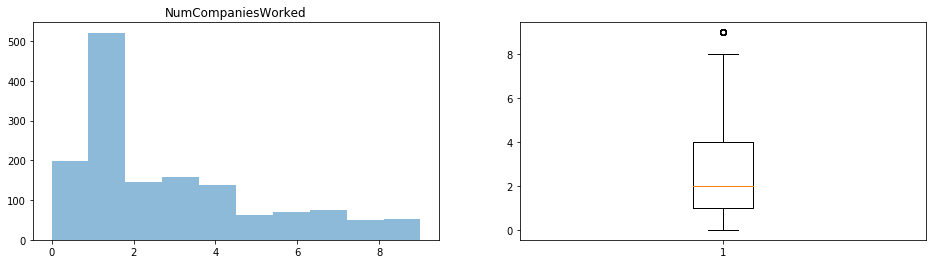

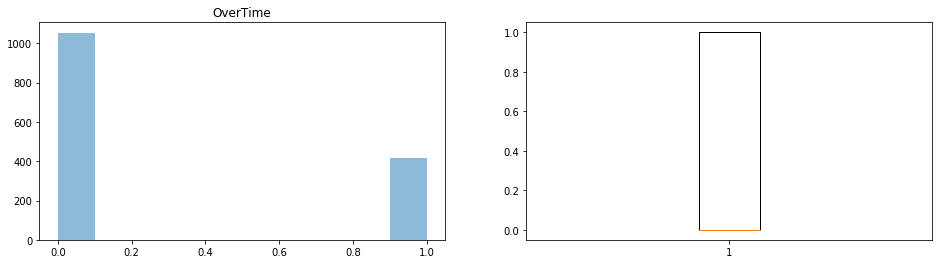

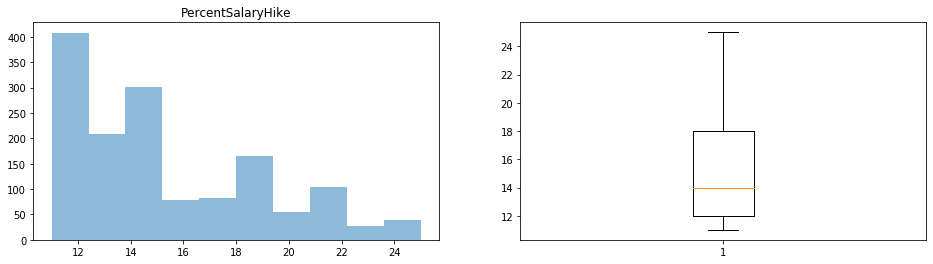

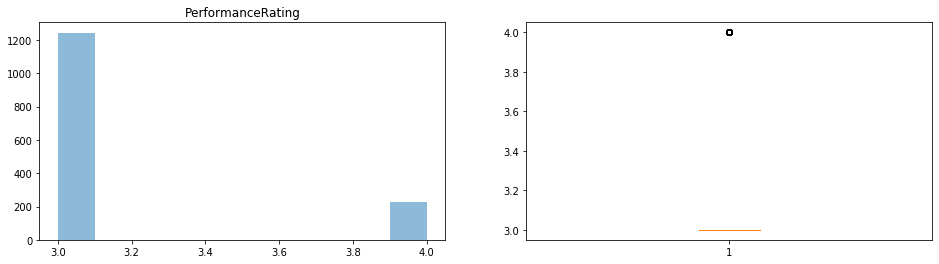

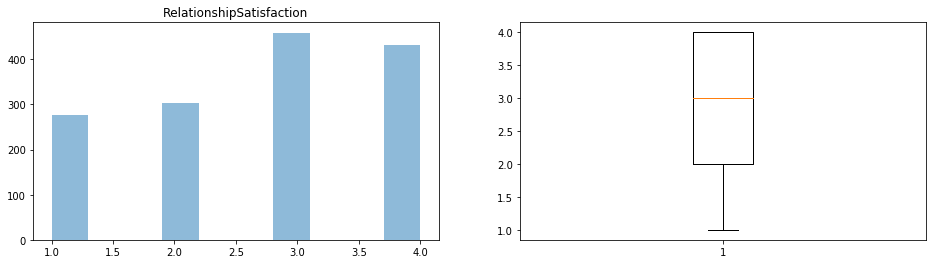

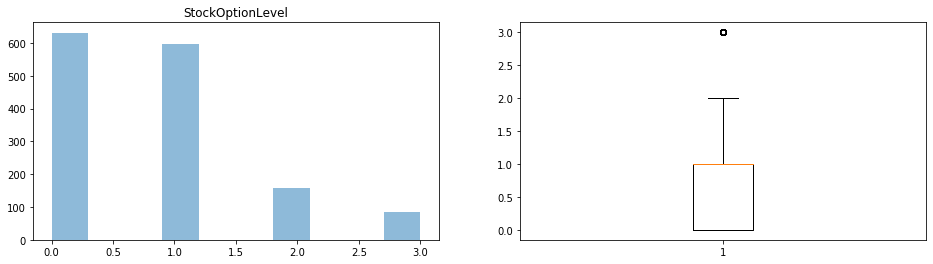

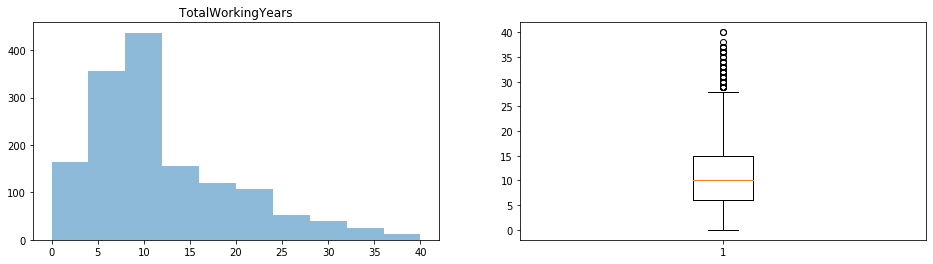

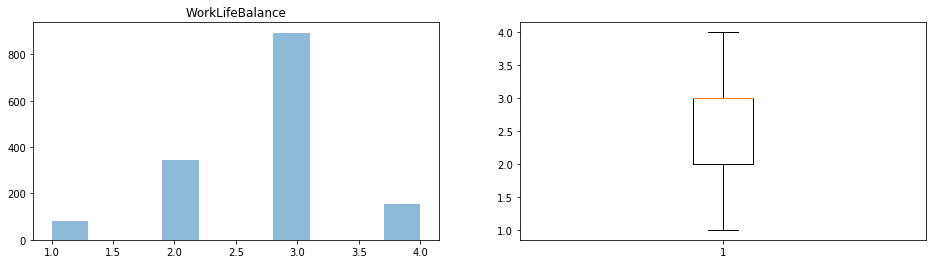

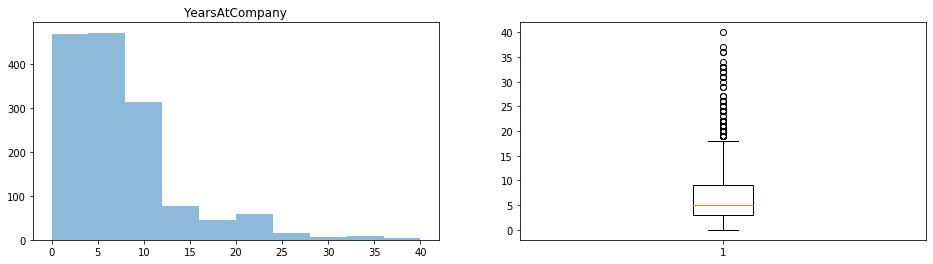

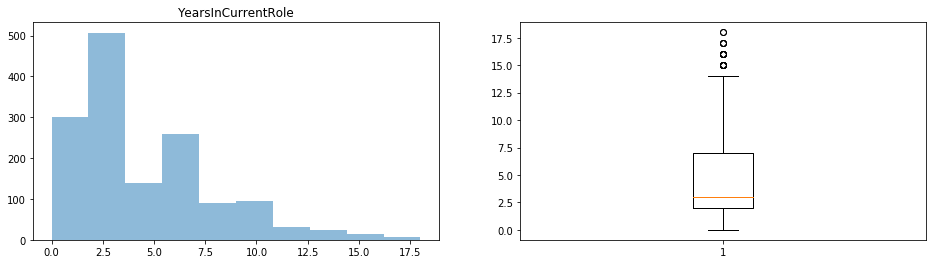

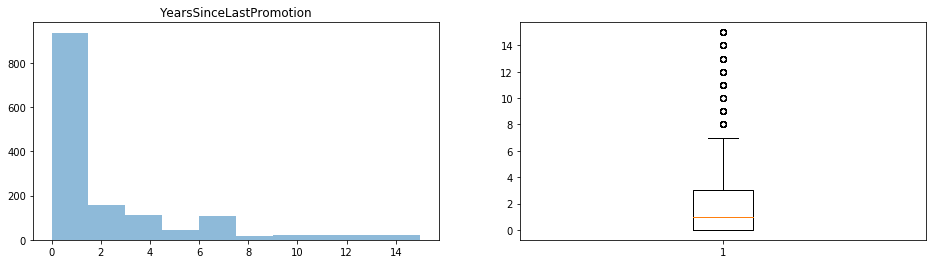

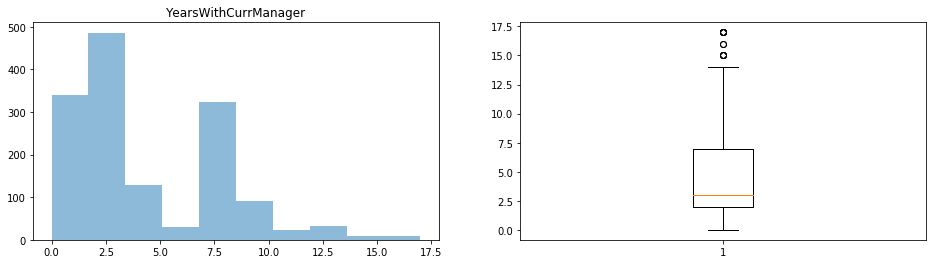

In [16]:
#creating the boxplots for the data
for i in num_cols:
    plotingvariables(data, i)

# Correlation

In [17]:
#getting the correlation matrix
data.corr()

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,...,0.003634,0.001904,0.053535,0.037510,0.680381,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,...,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,...,0.022704,0.000473,0.007846,0.042143,0.014515,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,...,0.040235,0.027110,0.006557,0.044872,0.004628,-0.026556,0.009508,0.018845,0.010029,0.014406
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,...,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,0.017621,1.000000,0.000508,-0.049857,-0.008278,0.001212,...,-0.031701,-0.029548,0.007665,0.003432,-0.002693,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.011716,-0.001851,0.022556,0.000508,1.000000,-0.000478,0.017960,-0.039403,...,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.035179,-0.049857,-0.000478,1.000000,0.042861,-0.027853,...,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,-0.006888,-0.008278,0.017960,0.042861,1.000000,-0.012630,...,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,-0.018519,0.001212,-0.039403,-0.027853,-0.012630,1.000000,...,-0.034730,-0.021222,0.021642,0.013984,0.782208,0.037818,0.534739,0.389447,0.353885,0.375281


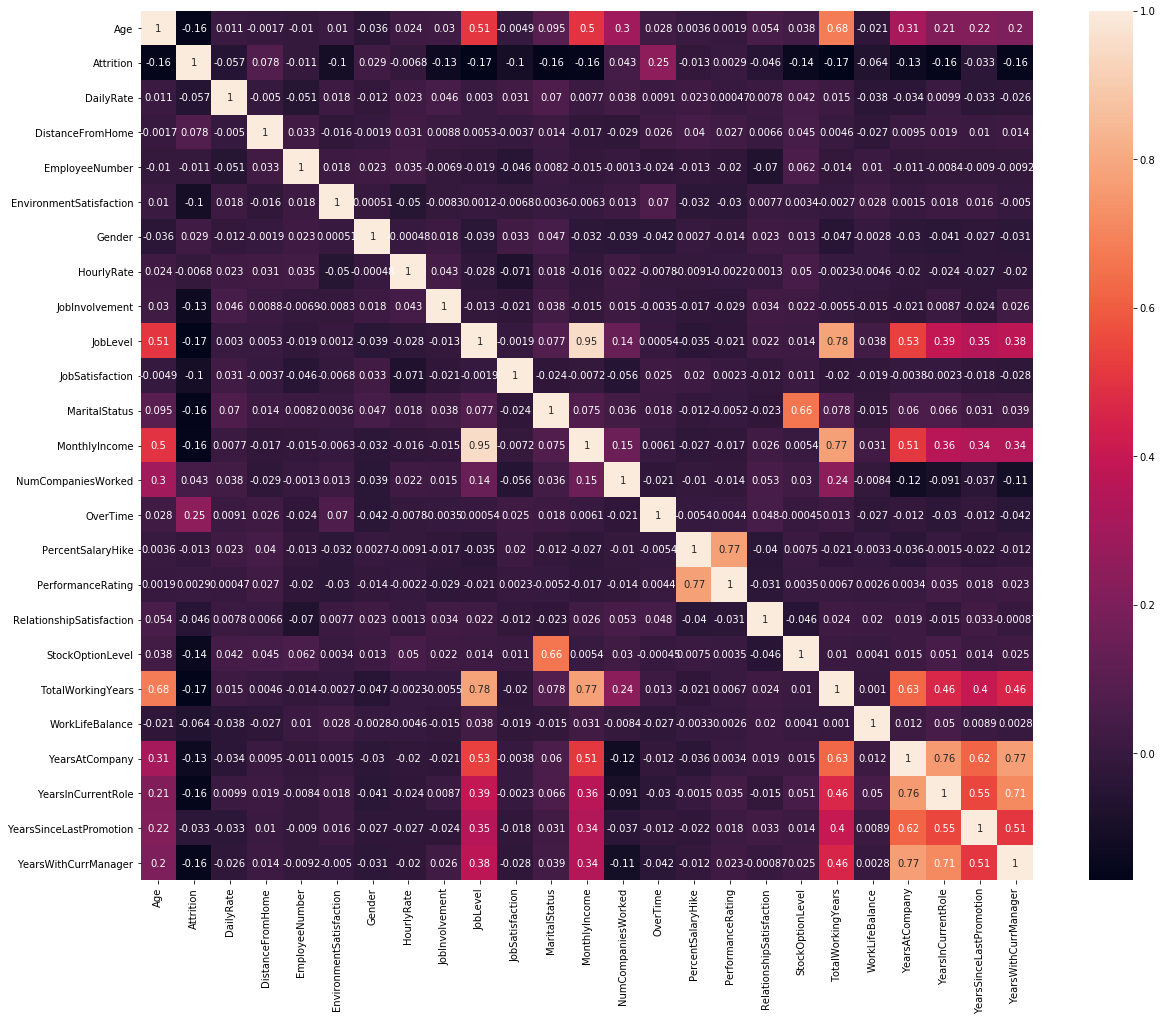

In [18]:
#lets plot it using heatmap
plt.figure(figsize = (20,16))
sns.heatmap(data.corr(), annot = True)

In [19]:
#lets create a function to to get the list of high correlated data
def corellation(dataset, threshold):
    col_corr = set() #set of all correlated values
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


#here i am settig the correlation threshold actually an ideal range of correlation is 0.3 to 0.8
corr_fea = corellation(data, 0.9)
print(corr_fea)


{'MonthlyIncome'}


In [20]:
#checking the statistical data to know about mean ,std, and percentile.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
Gender,1470.0,0.600000,0.490065,0.0,0.00,1.0,1.00,1.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


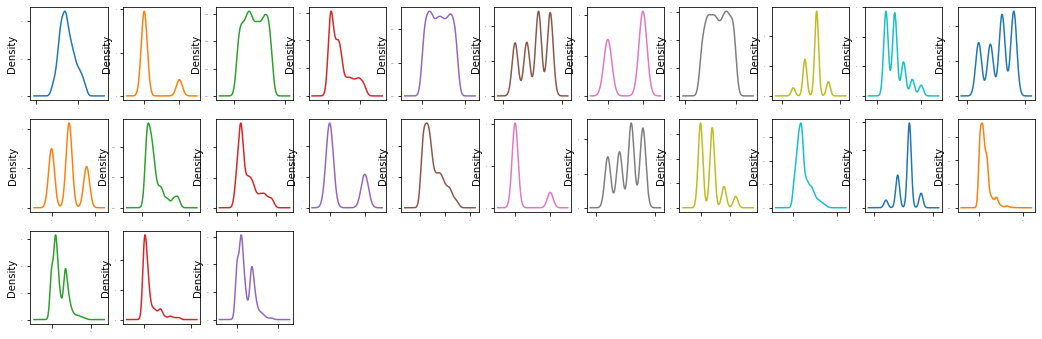

In [21]:
#Plotting the density function
data.plot(kind = 'density', subplots = True, layout = (6,11), sharex = False, legend = False, fontsize = 1, figsize = (18,12))
plt.show()

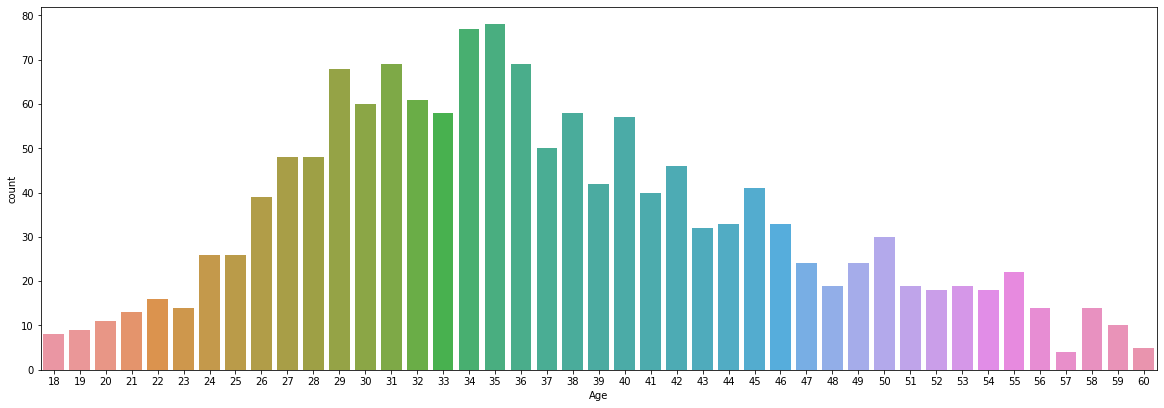

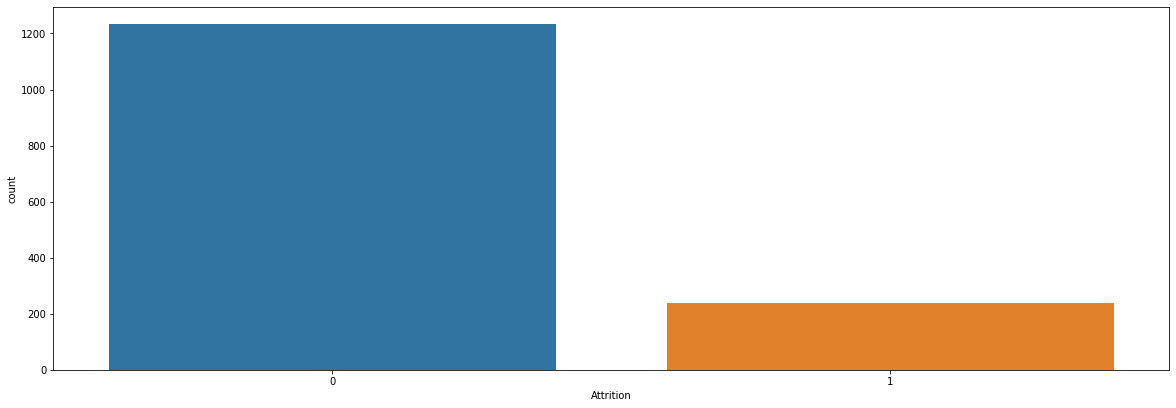

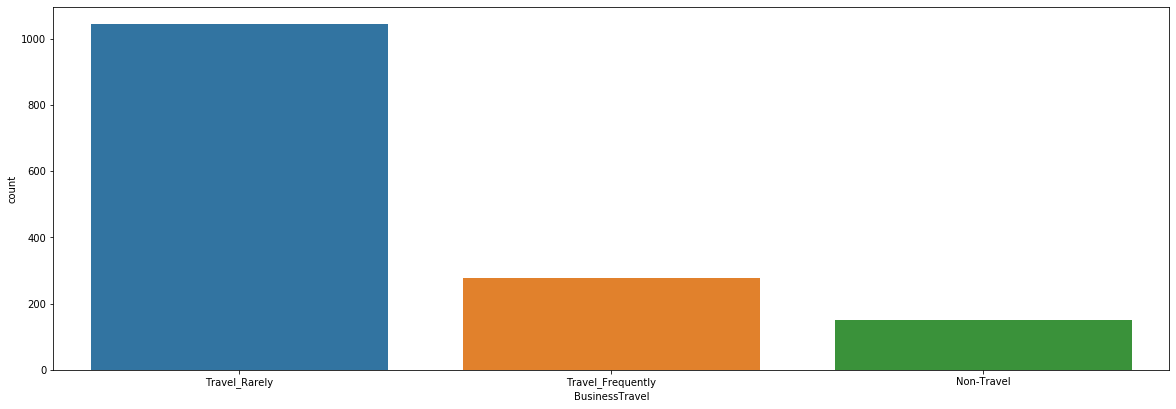

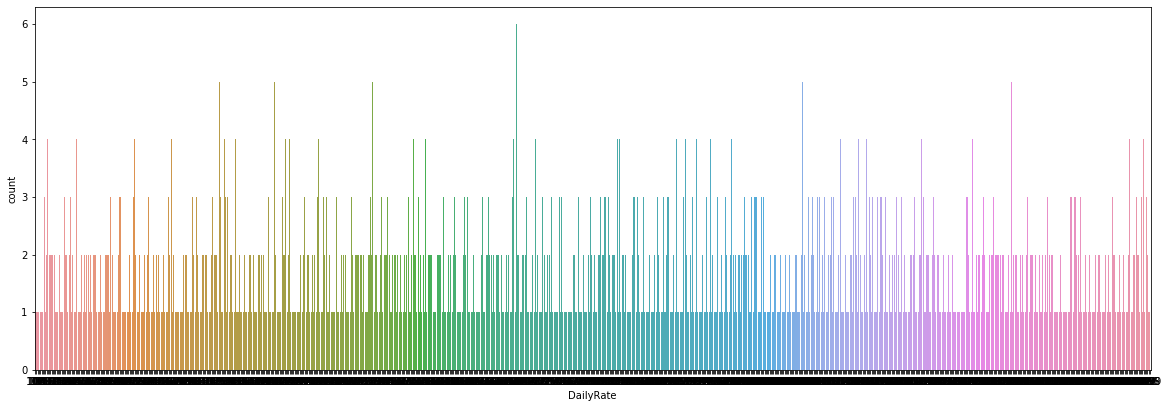

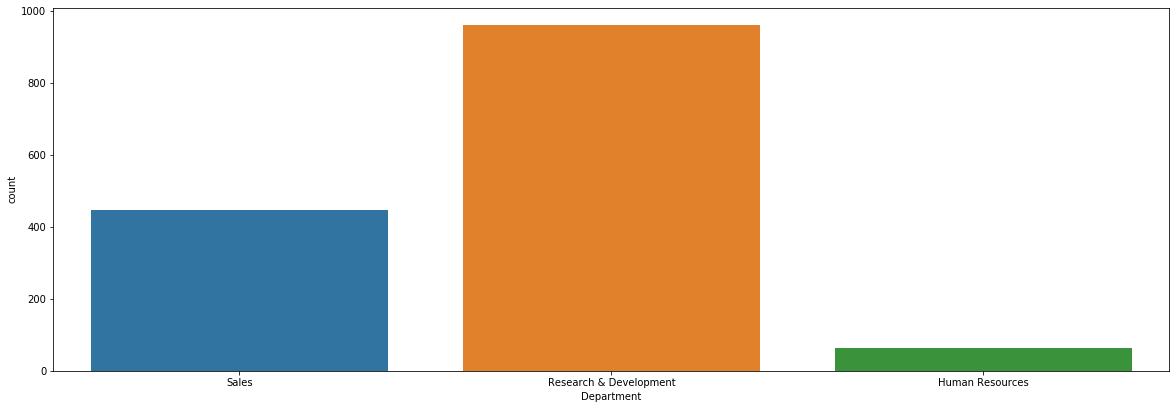

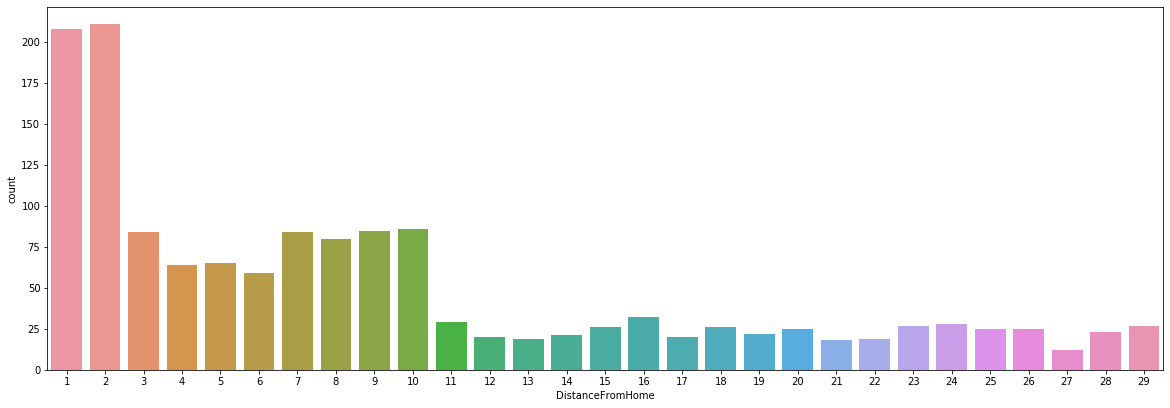

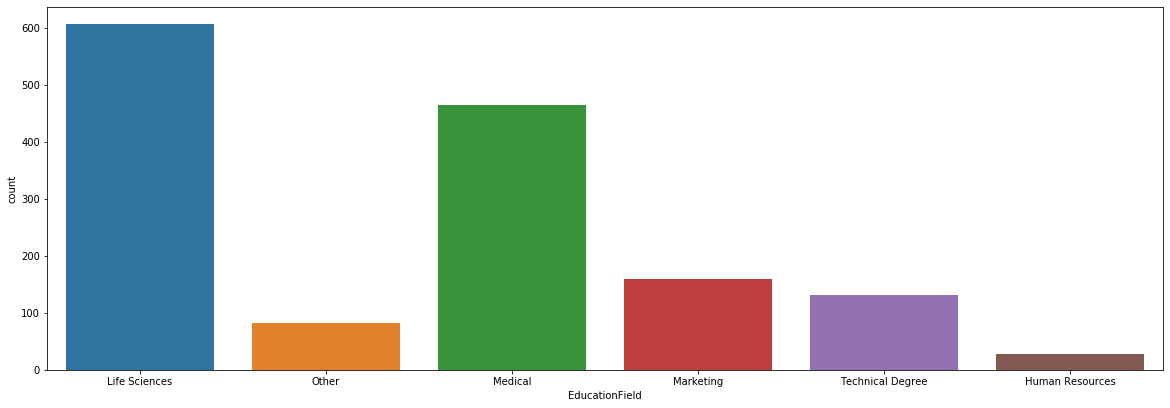

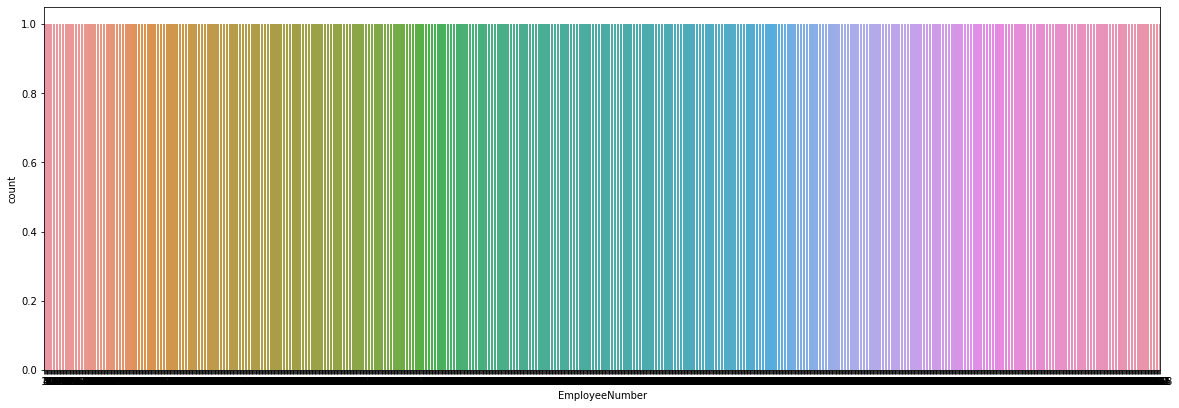

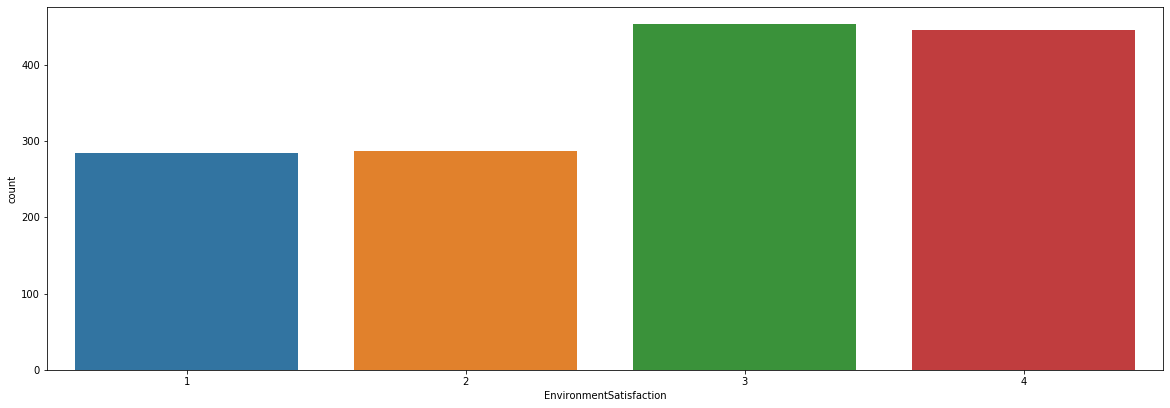

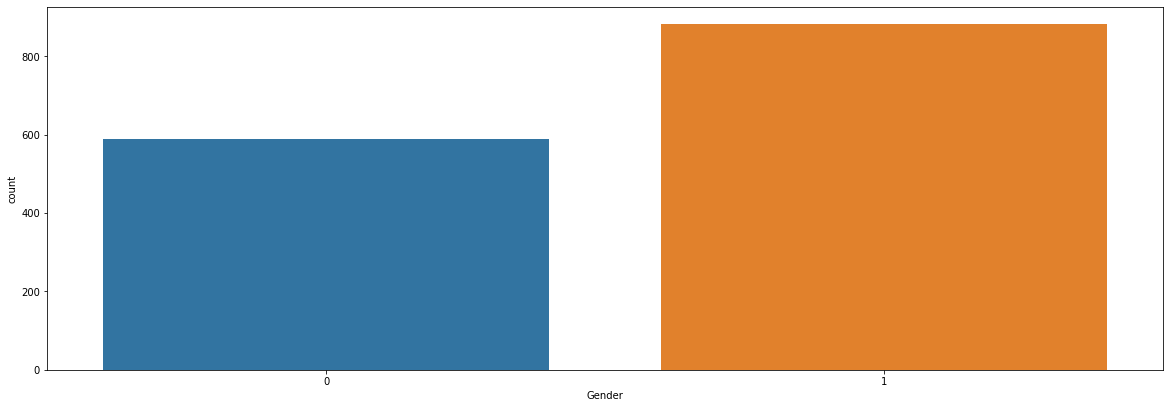

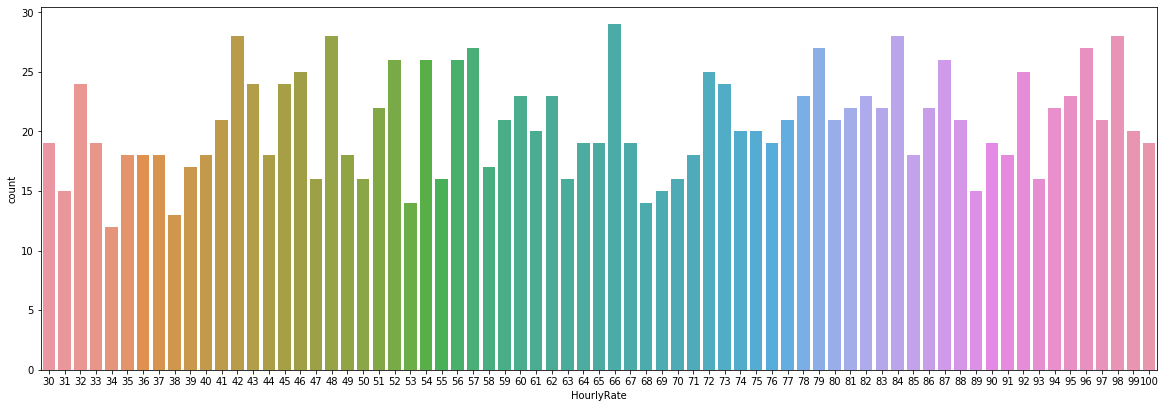

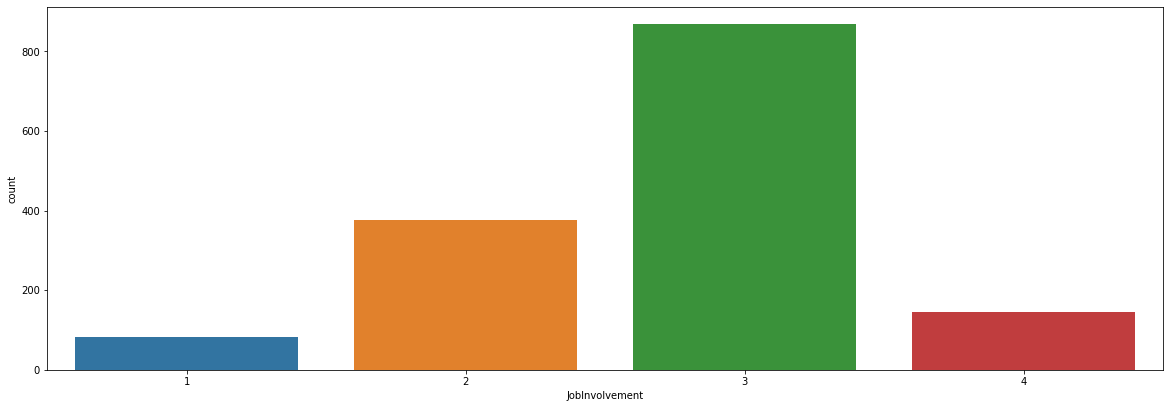

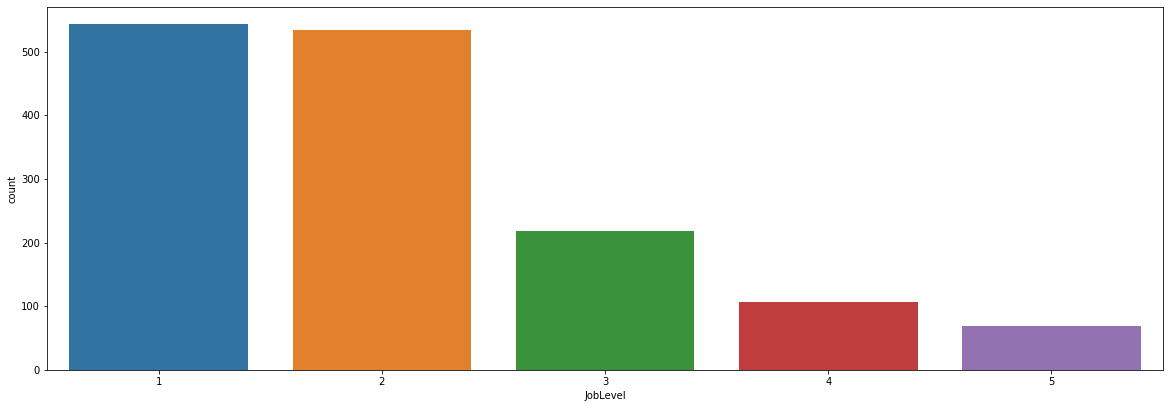

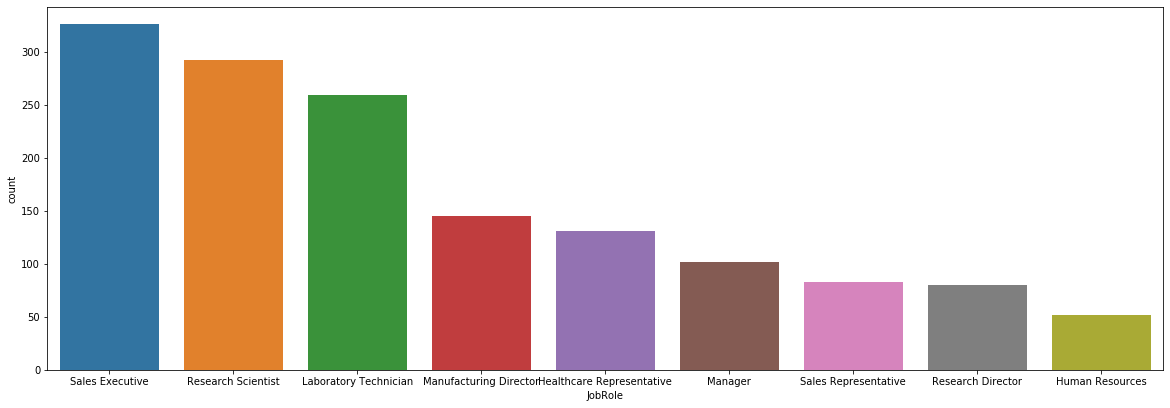

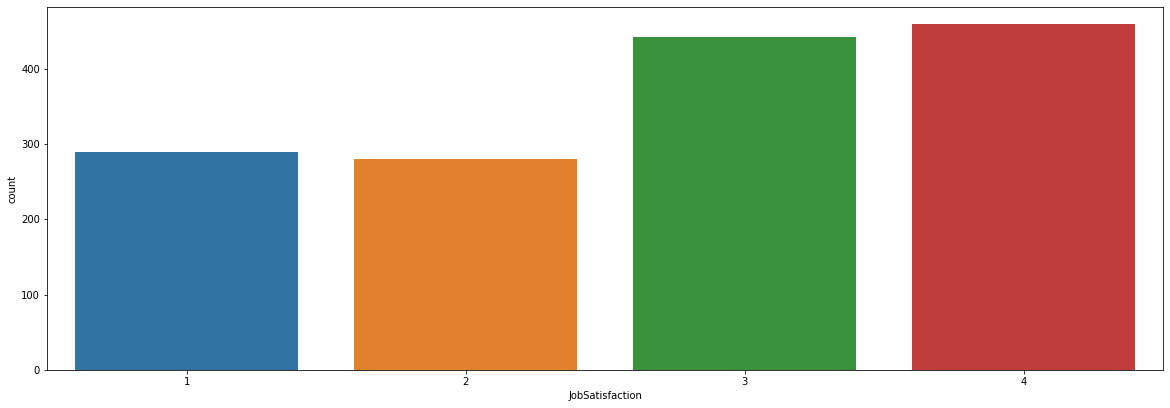

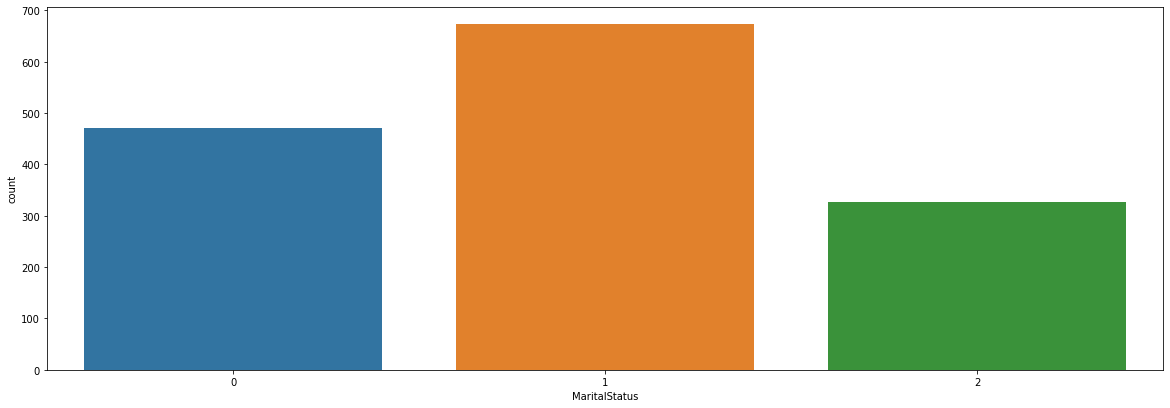

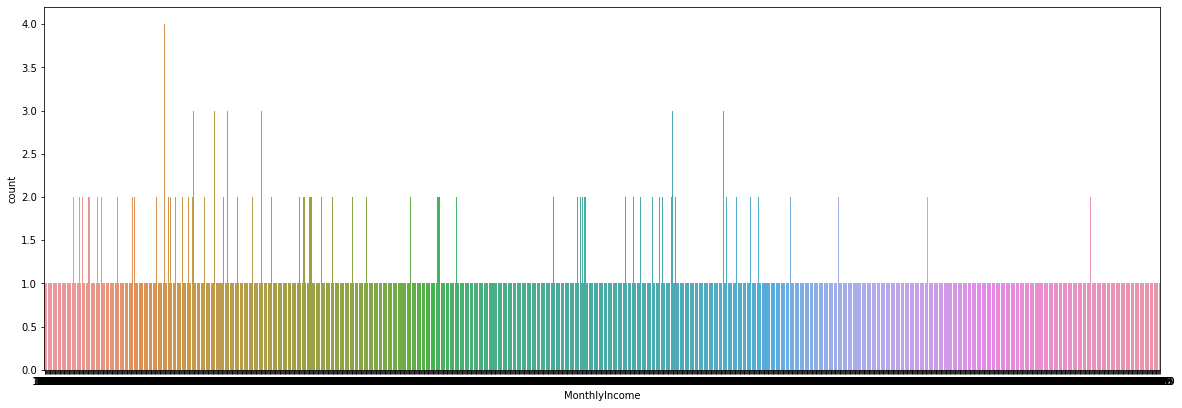

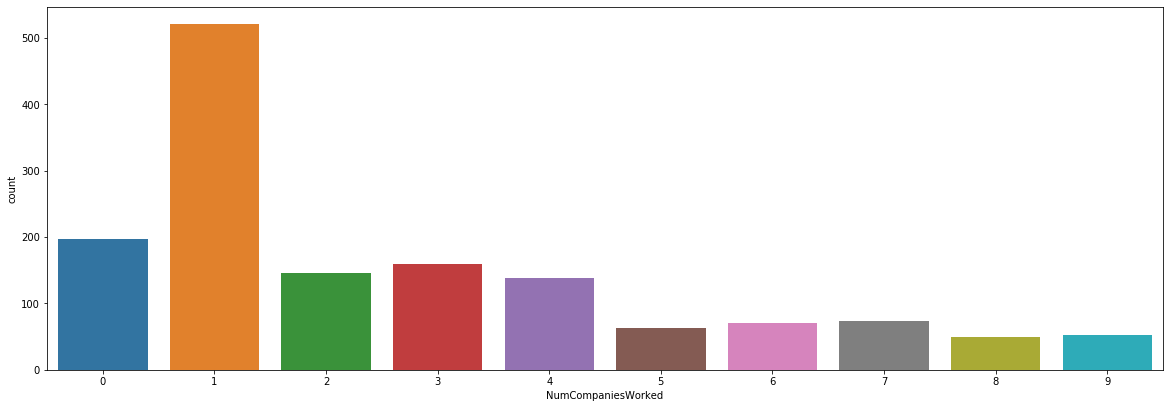

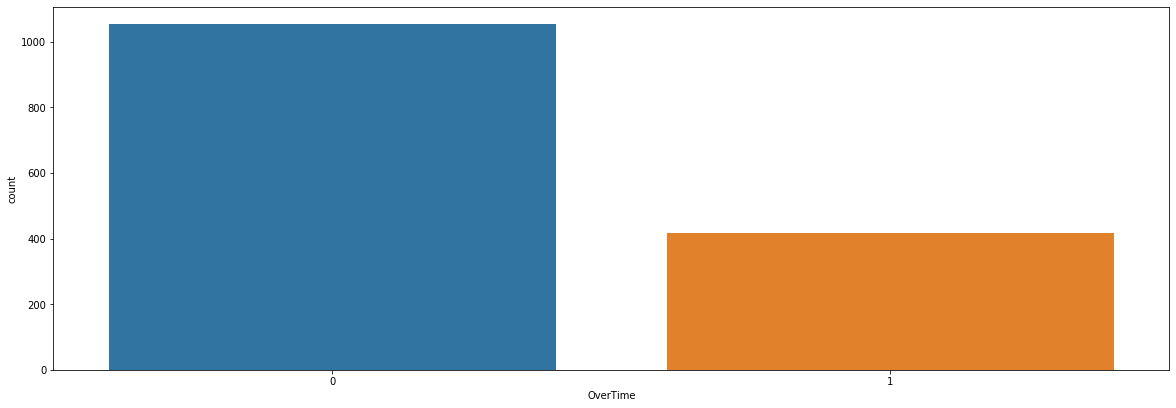

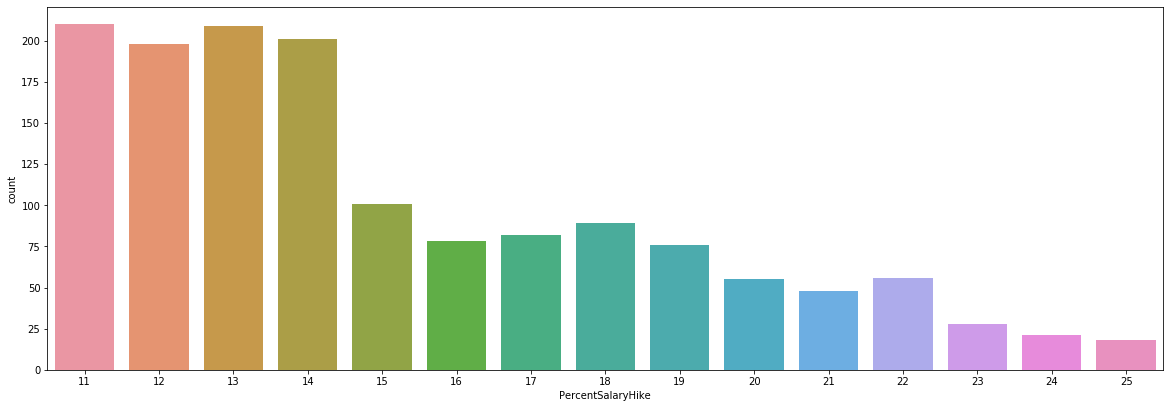

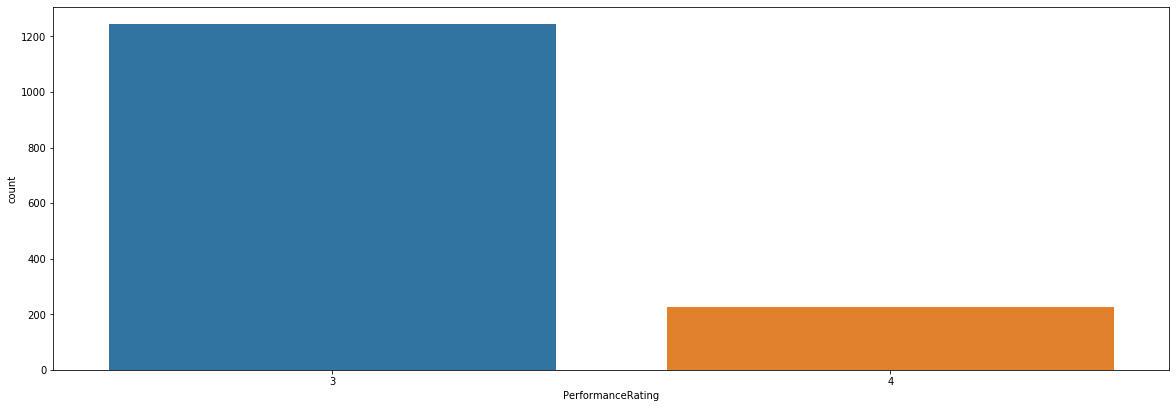

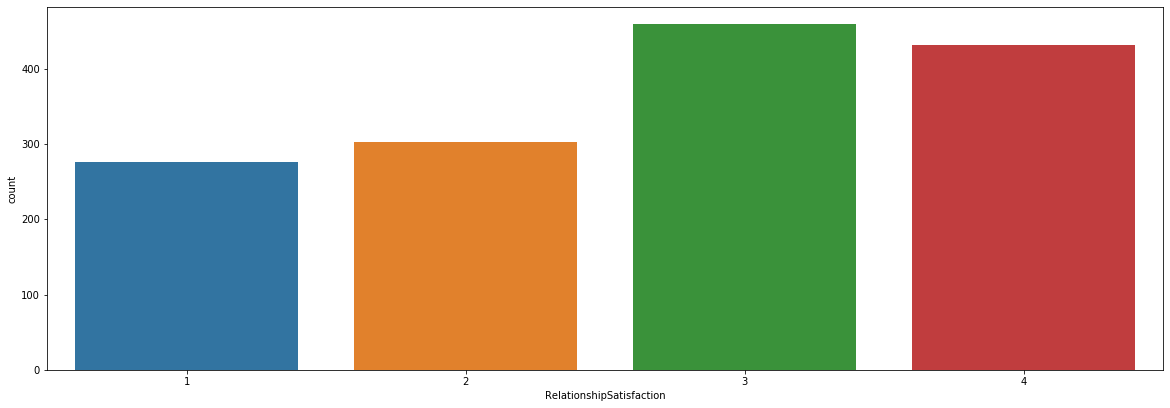

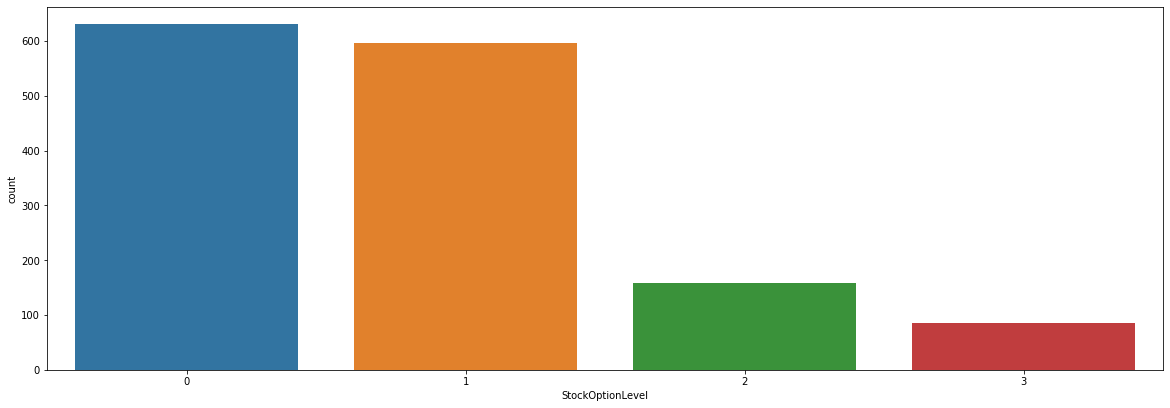

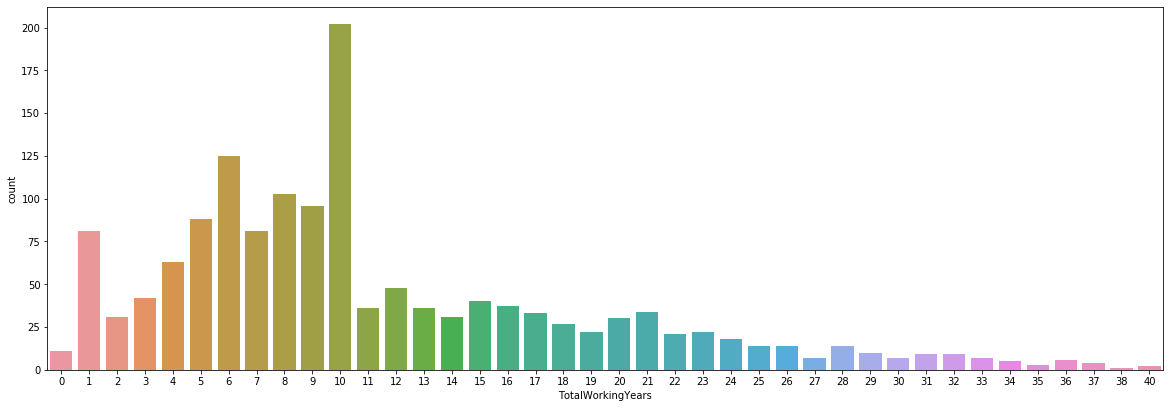

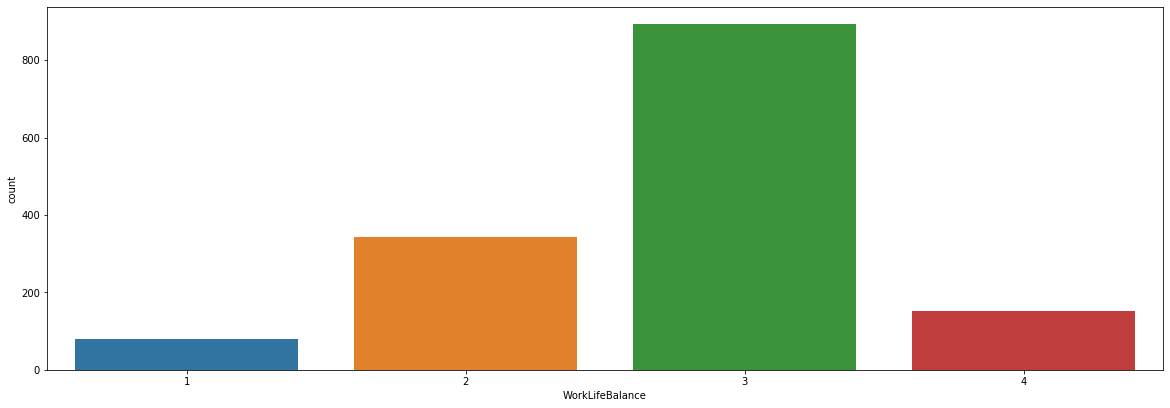

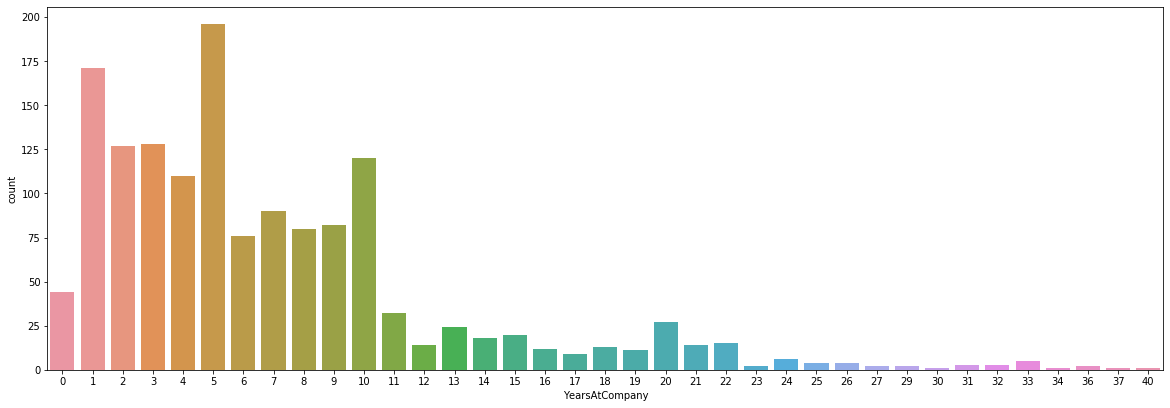

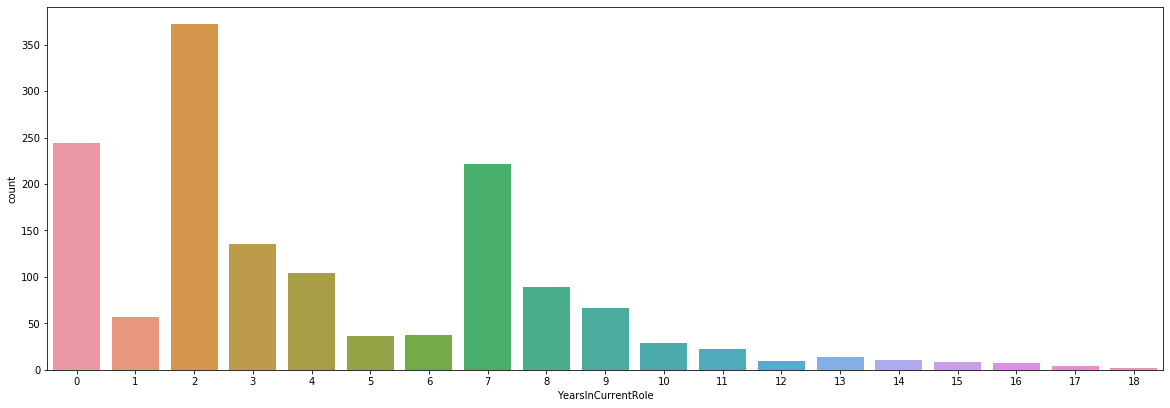

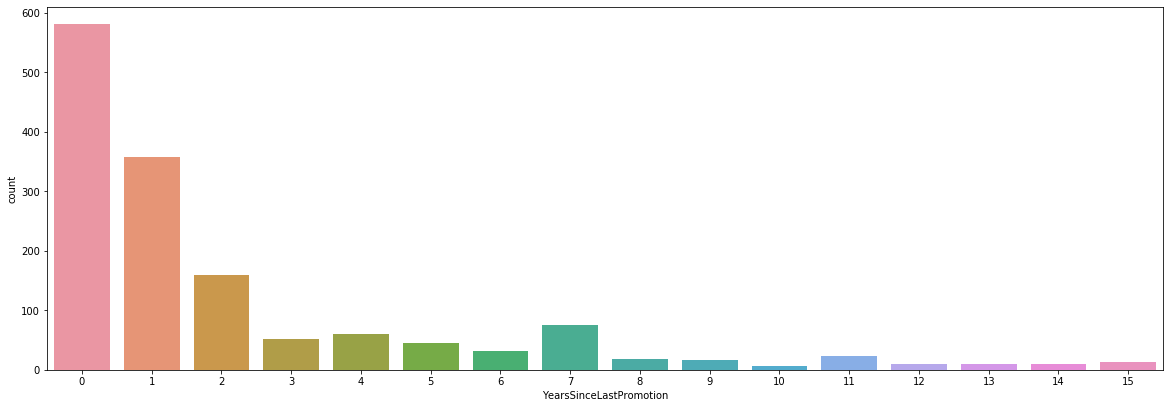

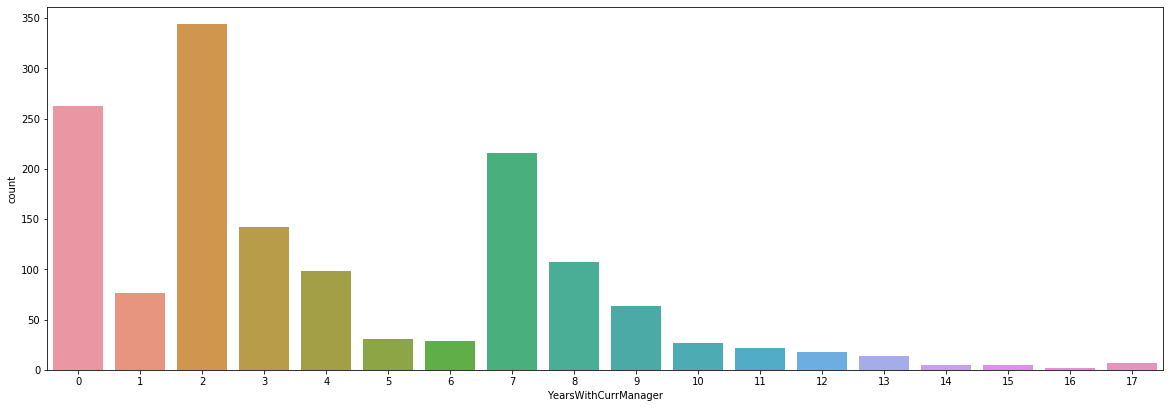

[(<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure size 1440x576 with 1 Axes>,
  None,
  None),
 (<Figure 

In [22]:
[(plt.figure(figsize=[20,8]),sns.countplot(data[i]), plt.subplots_adjust(bottom = 0.25), plt.show()) for i in data]

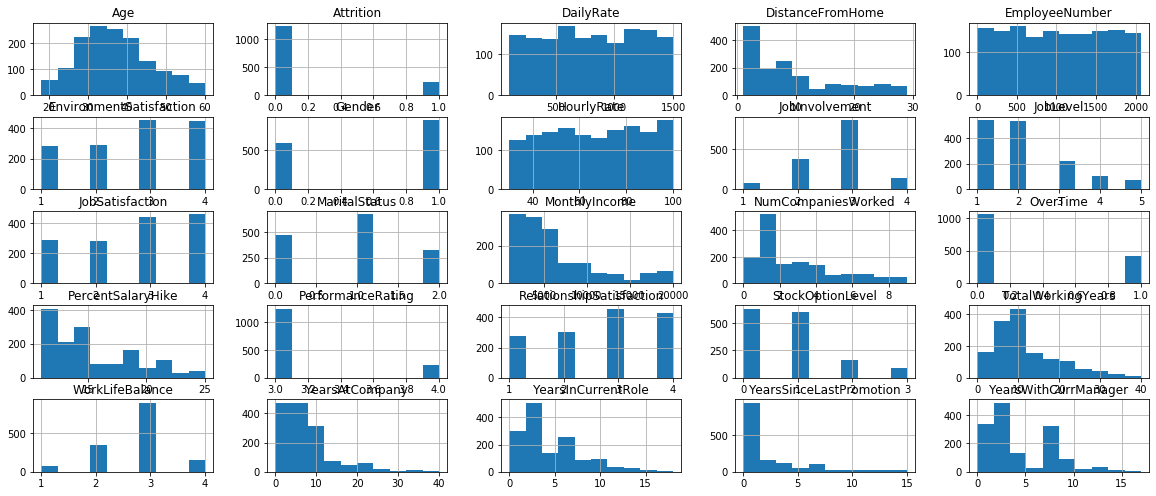

In [23]:
#drawing histogram for the data
data.hist(figsize=[20,8])
plt.subplots_adjust(bottom = 0.10)
plt.show()

In [24]:
#sns.pairplot(data)

In [25]:
#setting dummy variables for data
data = pd.get_dummies(data)
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1102,1,1,2,0,94,3,2,...,0,0,0,0,0,0,0,0,1,0
1,49,0,279,8,2,3,1,61,2,2,...,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,4,4,1,92,2,1,...,0,0,0,1,0,0,0,0,0,0
3,33,0,1392,3,5,4,0,56,3,1,...,0,0,0,0,0,0,0,1,0,0
4,27,0,591,2,7,1,1,40,3,1,...,0,0,0,1,0,0,0,0,0,0


# Seperating independent variable and target variables

In [26]:
#seperating independent variables and target variable
x = data.drop(["Attrition"], axis = 1)
y = data["Attrition"]
print(x.shape,y.shape)

(1470, 45) (1470,)


In [27]:
#using Robustscalar to remove outliers and adjusting data
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
mine = pd.DataFrame(scalar.fit_transform(x), columns=x.columns)
x = mine

In [28]:
from sklearn.preprocessing import power_transform
power = pd.DataFrame(power_transform(x, method = 'yeo-johnson'), columns=x.columns)
x = power

In [29]:
# Now scale the data, scaling mailny makes data into standard normal form
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
new = pd.DataFrame(scale.fit_transform(x), columns= x.columns)
x = new

Age                                 -0.000384
DailyRate                           -0.003399
DistanceFromHome                     0.188092
EmployeeNumber                       0.002959
EnvironmentSatisfaction             -0.056560
Gender                              -0.408665
HourlyRate                          -0.007523
JobInvolvement                       0.041653
JobLevel                             0.169700
JobSatisfaction                     -0.062903
MaritalStatus                        0.052562
MonthlyIncome                        0.162696
NumCompaniesWorked                   0.149693
OverTime                             0.964489
PercentSalaryHike                    0.110950
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.047863
StockOptionLevel                     0.214440
TotalWorkingYears                    0.029836
WorkLifeBalance                      0.041609
YearsAtCompany                       0.082846
YearsInCurrentRole                

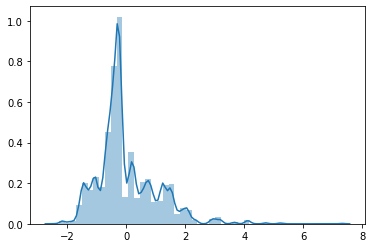

In [30]:
#now lets check the skewness of data
print(x.skew())
sns.distplot(x)

# model creation

In [31]:
#importing necessary libraries
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


In [32]:
#spliting into test data and train data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33, random_state = 100)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(984, 45) (984,) (486, 45) (486,)


In [33]:
#now checking the cross_val_score of models to get the best model 
models = []
models.append(('LR', LogisticRegression()))
models.append(('N', GaussianNB()))
models.append(('DEC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('RAN', RandomForestClassifier()))
models.append(('ADA', AdaBoostClassifier()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=100)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    
    msg = '%s: %f, %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.884354, 0.032340
N: 0.706803, 0.028934
DEC: 0.779592, 0.018803
KNN: 0.850340, 0.027211
SVC: 0.868707, 0.024911
RAN: 0.858503, 0.018704
ADA: 0.874830, 0.027414


In [34]:
#Lets create the instances of modles and create a lopp to predict the results
Logistic_regression = LogisticRegression()
Random_forest = RandomForestClassifier()
Ada_boost = AdaBoostClassifier()
svc = SVC()

model = []
model. append(('logistic_regression', LogisticRegression()))
model.append(('Random_forest', RandomForestClassifier()))
model.append(('Ada_boost', AdaBoostClassifier()))
model.append(("Svc", SVC()))

for n, m in model:
    m.fit(x_train,y_train)
    prediction = m.predict(x_test)
    print("accuracy score of {0} is {1}".format(n,accuracy_score(y_test, prediction)*100))
    print(confusion_matrix(y_test, prediction))
    print(classification_report(y_test, prediction))
    print("----------------------------------------------------------------------------------")
    print('\n')

accuracy score of logistic_regression is 85.39094650205762
[[380  25]
 [ 46  35]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       405
           1       0.58      0.43      0.50        81

    accuracy                           0.85       486
   macro avg       0.74      0.69      0.71       486
weighted avg       0.84      0.85      0.84       486

----------------------------------------------------------------------------------


accuracy score of Random_forest is 84.5679012345679
[[401   4]
 [ 71  10]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       405
           1       0.71      0.12      0.21        81

    accuracy                           0.85       486
   macro avg       0.78      0.56      0.56       486
weighted avg       0.83      0.85      0.80       486

----------------------------------------------------------------------------------


accuracy score of A

# HyperParameter Tuning

In [35]:
#setting parameter list for hyper parameter tuning
randomforest_params = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [0.1, 10, 20, 30, 100],
    'max_depth' : [5, 8, 15, 25, 30],
    'bootstrap' : [True, False]
}

In [36]:
#applying gridsearch CV on the parameter ,model and with the cross validation
Grid1 = GridSearchCV(Random_forest, randomforest_params, cv=5)

#fitiing the model
Grid1.fit(x_train,y_train)

#printing best params
print(Grid1.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 30}


0.8497942386831275
[[401   4]
 [ 69  12]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       405
           1       0.75      0.15      0.25        81

    accuracy                           0.85       486
   macro avg       0.80      0.57      0.58       486
weighted avg       0.84      0.85      0.81       486



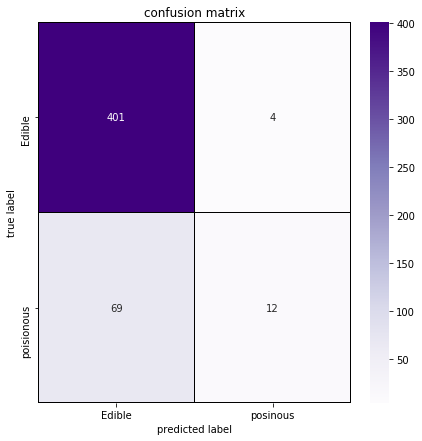

In [37]:
#getting predictions using tuned model
new_prediction = Grid1.predict(x_test)
print(accuracy_score(y_test, new_prediction))
print(confusion_matrix(y_test, new_prediction))
print(classification_report(y_test, new_prediction))

#ploting the confusion matrix
cm1 = confusion_matrix(y_test, new_prediction)
x_labe = ["Edible", "posinous"]
y_labe = ["Edible", "poisionous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm1, annot=True, linewidths=0.2, linecolor="black", fmt = ".0f", ax = ax, cmap="Purples", xticklabels=x_labe, yticklabels=y_labe)
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()


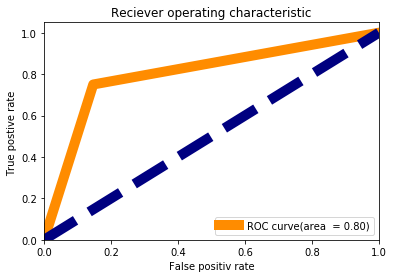

In [38]:
#ploting the auc-roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(new_prediction, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr ,tpr, color='darkorange', lw=10, label='ROC curve(area  = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color = 'navy', lw = 10, linestyle = '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.xlabel("False positiv rate")
plt.ylabel("True postive rate ")
plt.title("Reciever operating characteristic")
plt.legend(loc = "lower right")
plt.show()

# Saving the model

In [42]:
#dumping a model into a file with an extension .obj
import joblib
joblib.dump(Random_forest, "Random_forestmodel.obj")

['Random_forestmodel.obj']

In [43]:
#loading the model into an instance
model_prediction = joblib.load("Random_forestmodel.obj")

# Conclusion

In [64]:
#creating submission data
a = np.array(y_test)
predicted = np.array(model_prediction.predict(x_test))
submission = pd.DataFrame({'original' : a, 'predicted': predicted})

In [65]:
submission

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
481,0,0
482,0,0
483,1,1
484,1,1


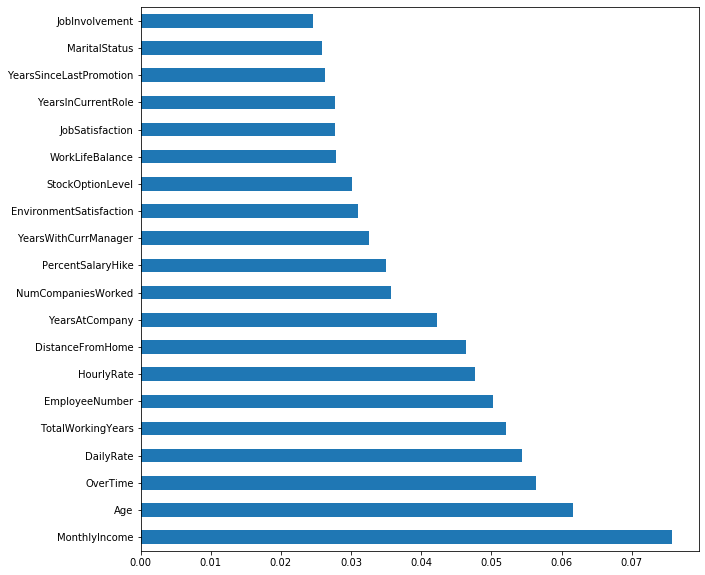

In [66]:
#plotting the feature importance to know the reason why Attrition happens 
model_prediction.fit(x,y)
important_of_features = pd.Series(model_prediction.feature_importances_, index=x.columns)
important_of_features = important_of_features.nlargest(20)
plt.figure(figsize=(10,10))
important_of_features.plot(kind = "barh")